In [1]:
# Prédiction de Prix Immobiliers

## Importation des Bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

## Chargement des Données

data = pd.read_csv('../data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [2]:
## Exploration des Données

print("Dimensions des données :", data.shape)
print("\nInformations sur les données :")
data.info()

print("\nValeurs manquantes :")
print(data.isnull().sum())

Dimensions des données : (20640, 10)

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB

Valeurs manquantes :
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population          

In [5]:
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


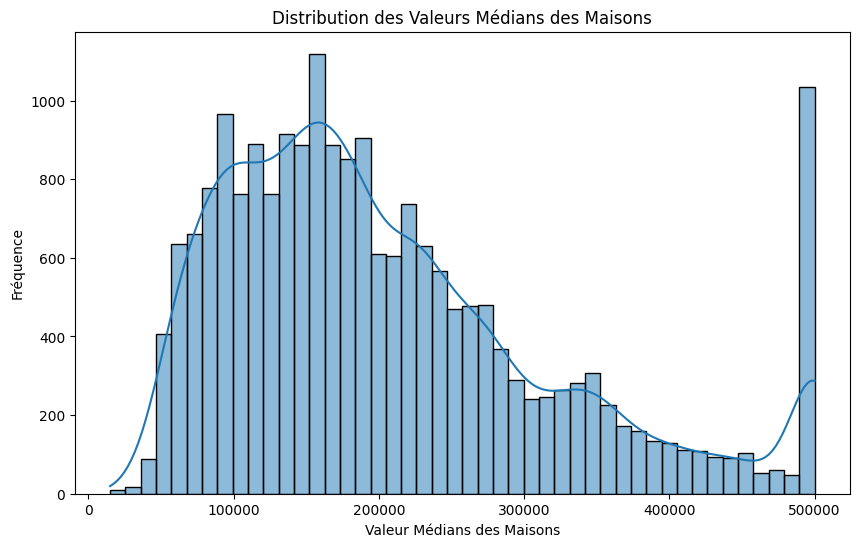

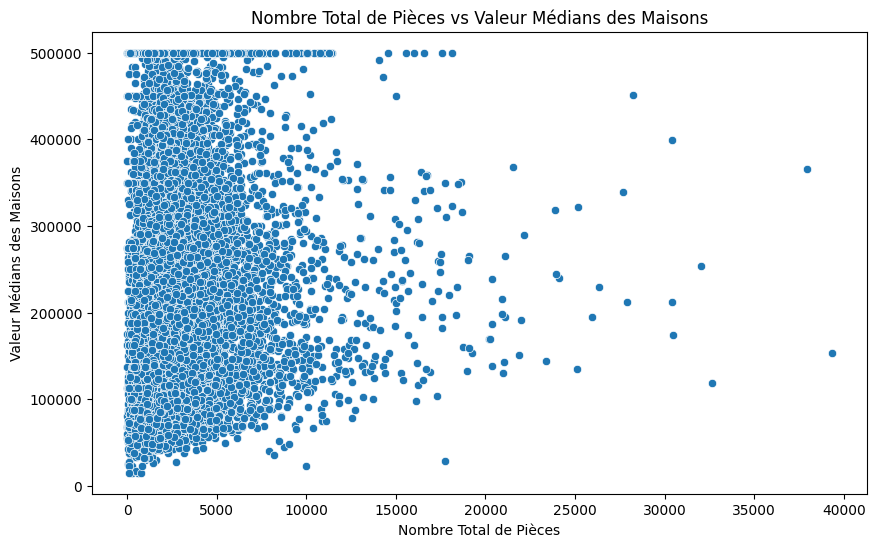

In [6]:
## Analyse Descriptive

plt.figure(figsize=(10,6))
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution des Valeurs Médians des Maisons')
plt.xlabel('Valeur Médians des Maisons')
plt.ylabel('Fréquence')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=data)
plt.title('Nombre Total de Pièces vs Valeur Médians des Maisons')
plt.xlabel('Nombre Total de Pièces')
plt.ylabel('Valeur Médians des Maisons')
plt.show()

In [8]:
## Prétraitement des Données

# Sélection des caractéristiques numériques
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('median_house_value')  # Variable cible

# Gestion des valeurs manquantes
data = data[numerical_features + ['median_house_value']].dropna()

# Séparation des variables explicatives et de la cible
X = data[numerical_features]
y = data['median_house_value']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
## Entraînement du Modèle

model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

In [10]:
## Évaluation du Modèle

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

RMSE : 70156.12
R² : 0.64


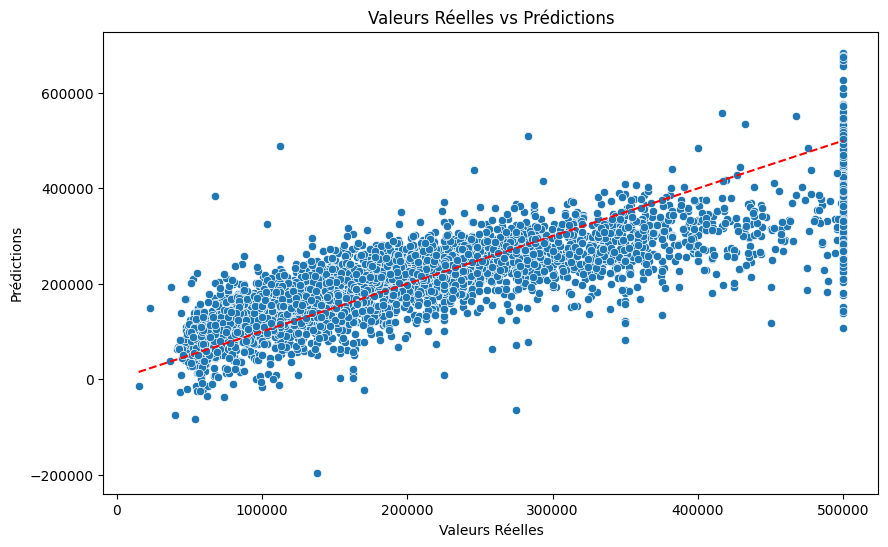

In [11]:
## Visualisation des Résultats

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.show()